+---------+-------+
|order_dow|  count|
+---------+-------+
|        0|6209666|
|        1|5665856|
|        6|4500304|
|        2|4217798|
|        5|4209532|
|        3|3844117|
|        4|3787213|
+---------+-------+

+-----------------+-------+
|order_hour_of_day|  count|
+-----------------+-------+
|               10|2764426|
|               11|2738581|
|               14|2691548|
|               15|2664533|
|               13|2663292|
|               12|2620847|
|               16|2537458|
|                9|2456713|
|               17|2089465|
|                8|1719973|
|               18|1637923|
|               19|1259401|
|               20| 977038|
|                7| 891937|
|               21| 796369|
|               22| 634733|
|               23| 402620|
|                6| 290795|
|                0| 218948|
|                1| 115786|
+-----------------+-------+
only showing top 20 rows



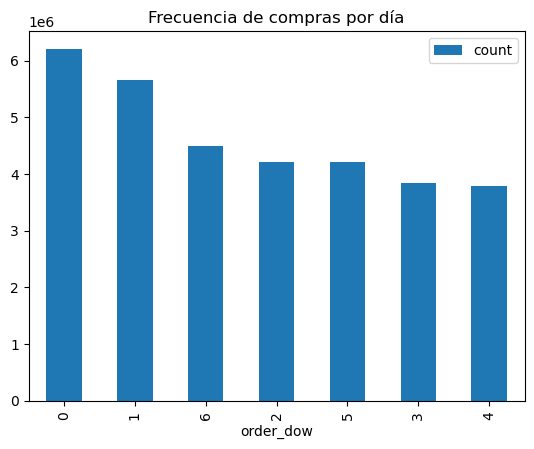

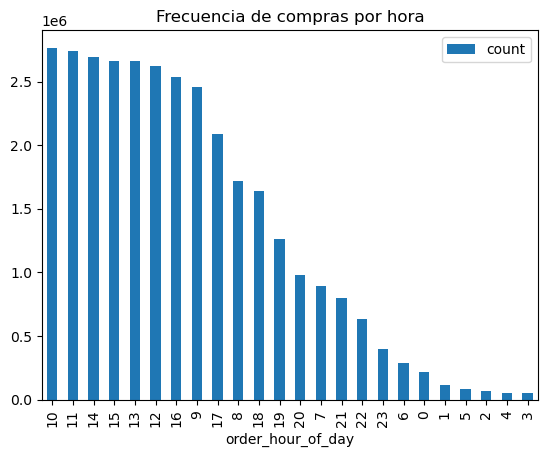

In [2]:
#Instalacion de modulos
!pip install pyspark

#Importar modulos
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count

# Crear una sesión de Spark
spark = SparkSession.builder.appName("Proyecto_Evaluacion").getOrCreate()

# Cargar los datos en DataFrames de Spark
df_department = spark.read.csv('data/departments.csv', header=True, inferSchema=True)
df_order_products = spark.read.csv('data/order_products__prior.csv', header=True, inferSchema=True)
df_orders = spark.read.csv('data/orders.csv', header=True, inferSchema=True)
df_products = spark.read.csv('data/products.csv', header=True, inferSchema=True)

#Eliminar atributos
df_orders = df_orders.drop('eval_set')
df_orders = df_orders.drop('days_since_prior_order')
df_products = df_products.drop('aisle_id')
df_order_products = df_order_products.drop('reordered')

#Unir los datos
data = df_orders.join(df_order_products, "order_id").join(df_products, "product_id").join(df_department, "department_id")

# Calcular la frecuencia de compras por día
orden_x_dia_sp = data.groupBy('order_dow').count().orderBy('count', ascending=False)
orden_x_dia_pd = orden_x_dia_sp.toPandas()
orden_x_dia_pd.set_index('order_dow', inplace=True)

# Visualizar la frecuencia de compras por día
orden_x_dia_pd.plot(kind='bar', title='Frecuencia de compras por día de la semana', edgecolor='black', color='skyblue')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de pedidos')
plt.show()

# Calcular la frecuencia de compras por hora
orden_x_hora_sp = data.groupBy('order_hour_of_day').count().orderBy('count', ascending=False)
orden_x_hora_pd = orden_x_hora_sp.toPandas()
orden_x_hora_pd.set_index('order_hour_of_day', inplace=True)

# Visualizar la frecuencia de compras por hora
orden_x_hora_pd.plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Frecuencia de compras por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de pedidos')
plt.xticks(range(24))
plt.show()

